<a href="https://colab.research.google.com/github/saugatbh/RainfallDataAnalysis/blob/main/RainfallPred_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn import preprocessing

datasetpath='/content/drive/My Drive/rainfall_data.npy'
dataset=np.load(datasetpath)
#print(dataset.shape)
#print(np.isnan(dataset))
#print(dataset<0)
datasetcopy=dataset.copy()
datasetcopy=np.where(datasetcopy<0,0,datasetcopy)
#print(datasetcopy<0)
normalized_data=np.zeros_like(datasetcopy)
#normalized_data[0,0] = preprocessing.normalize(datasetcopy[0,0])
#print(normalized_data[0][0])

xaxis=np.loadtxt('xaxis.txt')
yaxis=np.loadtxt('yaxis.txt')
#print((xaxis.shape))
#print(xaxis)
#print(yaxis)


years=np.arange(1901,2016)
training_years=np.arange(1901,2001)
testing_years=np.arange(2001,2016)
months=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

mask = np.zeros_like(datasetcopy, dtype=np.bool)

for ye in range(len(years)):
  for m in range(len(months)):
    for x in range(len(xaxis)):
      for y in range(len(yaxis)):
        if datasetcopy[ye, m, y, x] < 0:
          mask[ye, m, y, x] = True
    normalized_data[ye, m, :, :] = preprocessing.normalize(datasetcopy[ye, m, :, :])
print(normalized_data)

In [38]:
from statsmodels.tsa.stattools import adfuller
#df=pd.DataFrame(datasetcopy[0][0])
y1=datasetcopy[0][0].flatten()
print(y1)
y2=datasetcopy[0][1].flatten()
df=pd.Series(y1)
print(df)
result=adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
#df.plot()


[0. 0. 0. ... 0. 0. 0.]
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17410    0.0
17411    0.0
17412    0.0
17413    0.0
17414    0.0
Length: 17415, dtype: float64
ADF Statistic: -19.962378
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [44]:
X,Y=list(),list()
stepsize=135
for i in range(len(y1)):
  end_ix = i + stepsize
  if end_ix > len(y1)-1:
    break
  seq_x, seq_y = y1[i:end_ix], y1[end_ix]
  X.append(seq_x)
  Y.append(seq_y)
print(len(X))
print(len(Y))

17280
17280


In [46]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=stepsize))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(np.array(X), np.array(Y), epochs=2000, verbose=0)
# demonstrate prediction
x_input = np.array(y2)
#x_input = x_input.reshape((1, stepsize))
yhat = model.predict(x_input, verbose=0)
print(yhat)

ValueError: ignored

In [5]:
!pip install pyramid-arima
from pyramid.arima import auto_arima
stepwise_model = auto_arima(y1, start_p=1, start_q=1,max_p=2, max_q=2, m=6,start_P=0, seasonal=True,d=1, D=1, trace=True,stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 6); AIC=8251.454, BIC=8290.277, Fit time=59.109 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 6); AIC=20669.883, BIC=20685.412, Fit time=4.407 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 6); AIC=15815.835, BIC=15846.893, Fit time=14.849 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 6); AIC=8251.909, BIC=8282.968, Fit time=65.212 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 6); AIC=8250.068, BIC=8296.656, Fit time=89.250 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 6); AIC=15815.011, BIC=15853.834, Fit time=24.823 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 6); AIC=8241.334, BIC=8295.687, Fit time=136.383 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 6); AIC=8242.062, BIC=8288.650, Fit time=137.011 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 6); AIC=8175.533, BIC=8237.650, Fit time=165.717 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 2, 6); AIC=8236.447, BIC=8290.800, Fit time=119.991 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 2, 6); AIC=8076.637, BIC=8146.520, Fit time=213.119 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 2, 6); AIC=8273.747, BIC=8335.865, Fit time=156.607 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 1, 2, 6); AIC=8191.778, BIC=8269.425, Fit time=233.041 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 6); AIC=8162.503, BIC=8224.621, Fit time=98.254 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 6); AIC=8017.281, BIC=8071.634, Fit time=119.992 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 6); AIC=8217.028, BIC=8263.616, Fit time=78.559 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 6); AIC=8157.398, BIC=8203.986, Fit time=107.847 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 6); AIC=17117.803, BIC=17164.391, Fit time=62.256 seconds
Total fit time: 1886.437 seconds
8017.28072824556


In [ ]:
stepwise_model.fit(train)
#future_forecast = stepwise_model.predict(n_periods=36)

In [ ]:
training_data=np.zeros((100,12,37,32))
testing_data=np.zeros((15,12,37,32))

training_data=normalized_data[0:100,:,87:124,62:94]
testing_data=normalized_data[100:116,:,87:124,62:94]
ne_x=(xaxis[87:123])
ne_y=(yaxis[62:93])
print(ne_x,ne_y)

In [32]:
print(np.max(training_data))
print(training_data[0,0].shape)

0.7410014348279087
(37, 32)


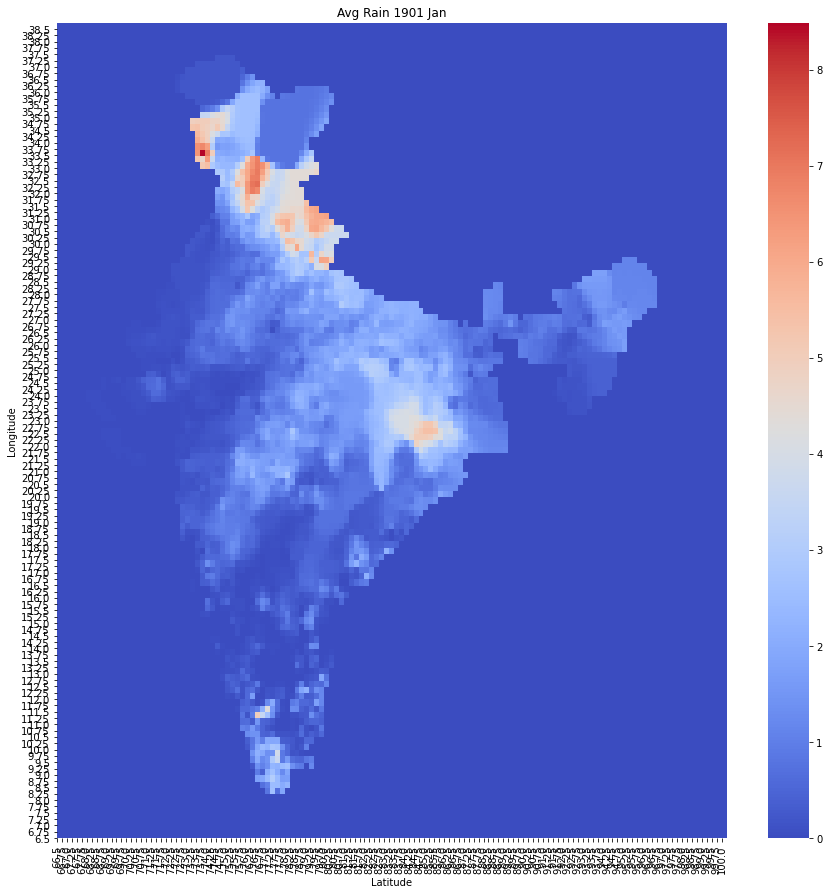

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

msk=mask[0,0]

plt.figure(figsize=(15,15))
sns.heatmap(datasetcopy[0,0],mask=msk,vmin=0,vmax=np.max(datasetcopy[0,0]),cmap='coolwarm')
plt.title("Avg Rain 1901 Jan")
plt.gca().invert_yaxis()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xticks(range(len(xaxis)), xaxis)
plt.yticks(range(len(yaxis)), yaxis)
plt.show()